In [1]:
cd ..

/home/mars/Documents/src_aiai


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2
%aimport src.visualisation, src.benchmark

In [4]:
from src.data import load_M51
from src.sampling.uv_sampling import spider_sampling
from src.operators.measurement import NUFFT_op
from src.operators.dictionary import wavelet_basis
from src.solvers import PrimalDual_l1_constrained
from src.benchmark import benchmark
from src.visualisation import visualise_benchmark

Failed to import NUDFT_cupy (experimental). Use NUDFT() instead. 


In [5]:
x_true = load_M51()

# NUFFT Primal Dual L1 constrained

In [6]:
uv = spider_sampling()
m_op = NUFFT_op(uv)
psi = wavelet_basis(x_true.shape)
solver = PrimalDual_l1_constrained(m_op=m_op, psi=psi)

{'tol': 0.0001, 'iter': 5000, 'update_iter': 50, 'record_iters': False, 'positivity': True, 'real': True}


In [7]:
results_50 = benchmark(x_true, solver, m_op, 50, 
    save_name="./results/PD_l1_con_50dB_NUFFT")

Solved using ./results/PD_l1_con_50dB_NUFFT
ISNR: 50dB
Solving took 11.05 mins


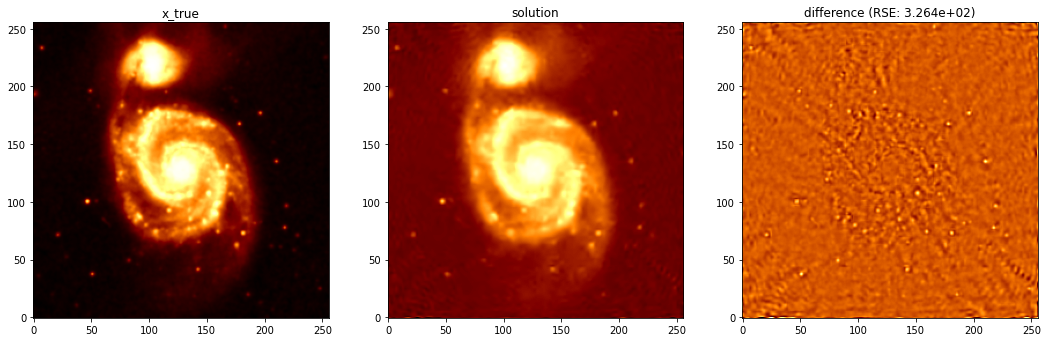

In [8]:
visualise_benchmark(results_50)

In [22]:
solver = PrimalDual_l1_constrained(m_op=m_op, psi=psi)
results_30 = benchmark(x_true, solver, m_op, 30, 
    save_name="./results/PD_l1_con_30dB_NUFFT")

{'tol': 1e-05, 'iter': 5000, 'update_iter': 50, 'record_iters': False, 'positivity': True, 'real': True}
2021-05-18 12:03:59,082 - Optimus Primal - INFO - Starting Power method
2021-05-18 12:03:59,137 - Optimus Primal - INFO - [Power Method] iter = 1, tol = 0.0
2021-05-18 12:03:59,387 - Optimus Primal - INFO - [Power Method] Converged with norm= 5.7324786, iter = 11, tol = 0.0009886757
2021-05-18 12:03:59,445 - Optimus Primal - INFO - Running Forward Backward Primal Dual
2021-05-18 12:03:59,540 - Optimus Primal - INFO - [Primal Dual] 0 out of 5000 iterations, tol = 0.630436
2021-05-18 12:04:03,822 - Optimus Primal - INFO - [Primal Dual] 50 out of 5000 iterations, tol = 0.018885
2021-05-18 12:04:08,293 - Optimus Primal - INFO - [Primal Dual] 100 out of 5000 iterations, tol = 0.010175
2021-05-18 12:04:12,988 - Optimus Primal - INFO - [Primal Dual] 150 out of 5000 iterations, tol = 0.003331
2021-05-18 12:04:18,022 - Optimus Primal - INFO - [Primal Dual] 200 out of 5000 iterations, tol = 0

Solved using ./results/PD_l1_con_30dB_NUFFT
ISNR: 30dB
Solving took 10.31 mins


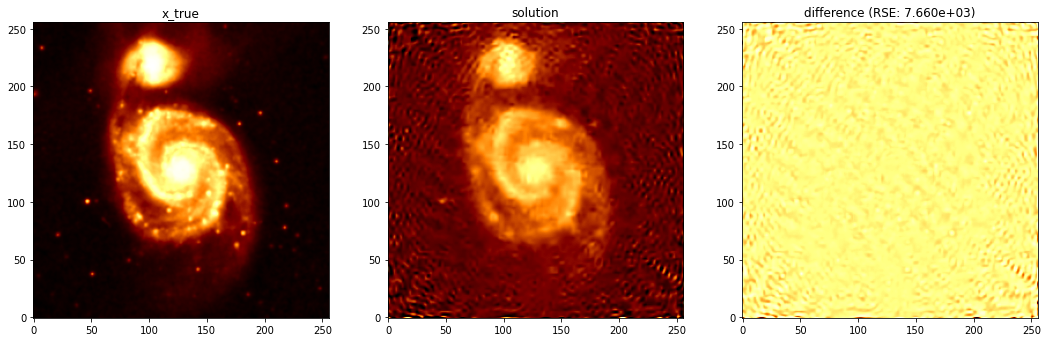

In [23]:
visualise_benchmark(results_30)